In [1]:
#1. Download the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#2. Load the dataset into the tool
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<AxesSubplot:xlabel='Age'>

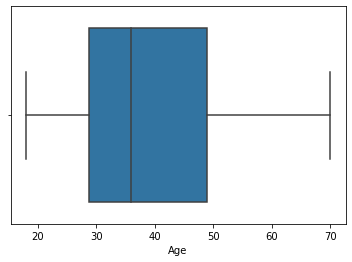

In [8]:
#3. Perform Below Visualizations
#Univariate Analysis
sns.boxplot(x=df['Age'])

C:\Users\shire\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Age'>

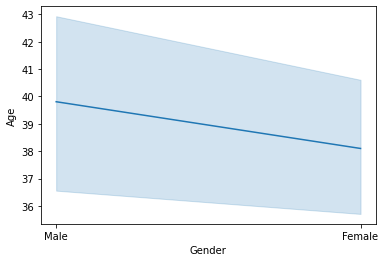

In [9]:
# Bi- Variate Analysis
sns.lineplot(df['Gender'],df['Age'])

<AxesSubplot:>

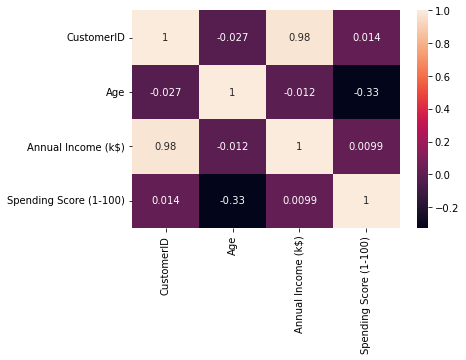

In [10]:
# Multi-Variate Analysis
sns.heatmap(df.corr(),annot=True)

In [11]:
#4. Perform descriptive statistics on the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [13]:
#5. Check for Missing values and deal with them.
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
#6. Find the outliers and replace them outliers
df['Gender'].replace({'Male':1, 'Female':0},inplace=True)

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [16]:
df.Gender.unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='Spending Score (1-100)'>

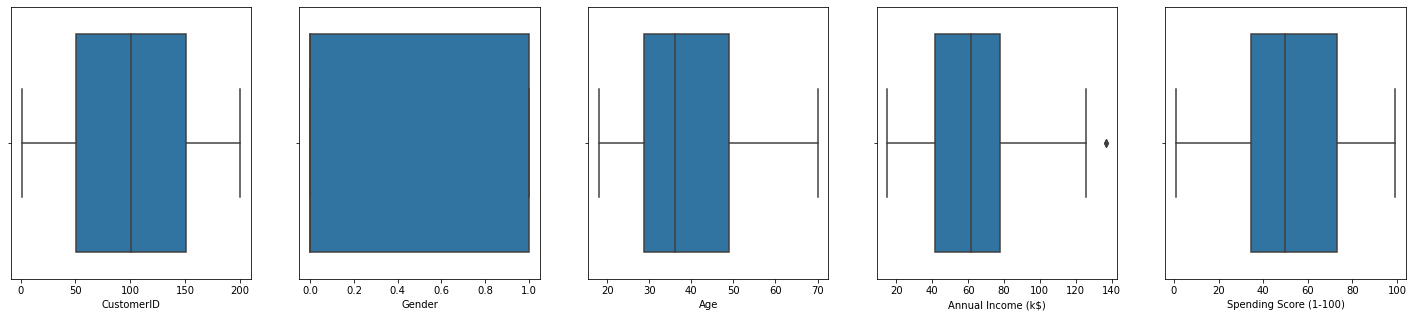

In [17]:
fig,ax = plt.subplots(figsize=(25,5))

plt.subplot(1,5,1)
sns.boxplot(x=df["CustomerID"])

plt.subplot(1,5,2)
sns.boxplot(x=df["Gender"])

plt.subplot(1,5,3)
sns.boxplot(x=df["Age"])

plt.subplot(1,5,4)
sns.boxplot(x=df["Annual Income (k$)"])

plt.subplot(1,5,5)
sns.boxplot(x=df["Spending Score (1-100)"])

In [18]:
#handle outlier
qnt=df.quantile(q=[0.25,0.75])
qnt

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,0.0,28.75,41.5,34.75
0.75,150.25,1.0,49.00,78.0,73.00


In [19]:
iqr=qnt.loc[0.75]-qnt.loc[0.25]
iqr

CustomerID                99.50
Gender                     1.00
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [20]:
#lower limit
lower=qnt.loc[0.25]-(1.5*iqr)
lower

CustomerID               -98.500
Gender                    -1.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [21]:
upper=qnt.loc[0.75]+(1.5*iqr)
upper

CustomerID                299.500
Gender                      2.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [22]:
df.mean()

CustomerID                100.50
Gender                      0.44
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [23]:
#replace outlier
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>132.750,-13.250,df['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)'>

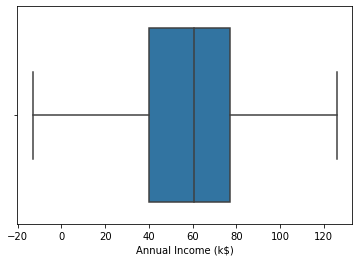

In [24]:
sns.boxplot(x=df['Annual Income (k$)'])

In [25]:
#7. Check for Categorical columns and perform encoding
df.head()
#Gender is categorical and encoding is performed

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


In [26]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [27]:
#8. Scaling the data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [28]:
data=sc.fit_transform(df.iloc[:,1:])
data

array([[1.        , 0.01923077, 0.20287253, 0.3877551 ],
       [1.        , 0.05769231, 0.20287253, 0.81632653],
       [0.        , 0.03846154, 0.21005386, 0.05102041],
       [0.        , 0.09615385, 0.21005386, 0.7755102 ],
       [0.        , 0.25      , 0.21723519, 0.39795918],
       [0.        , 0.07692308, 0.21723519, 0.76530612],
       [0.        , 0.32692308, 0.22441652, 0.05102041],
       [0.        , 0.09615385, 0.22441652, 0.94897959],
       [1.        , 0.88461538, 0.23159785, 0.02040816],
       [0.        , 0.23076923, 0.23159785, 0.7244898 ],
       [1.        , 0.94230769, 0.23159785, 0.13265306],
       [0.        , 0.32692308, 0.23159785, 1.        ],
       [0.        , 0.76923077, 0.23877917, 0.14285714],
       [0.        , 0.11538462, 0.23877917, 0.7755102 ],
       [1.        , 0.36538462, 0.23877917, 0.12244898],
       [1.        , 0.07692308, 0.23877917, 0.79591837],
       [0.        , 0.32692308, 0.2459605 , 0.34693878],
       [1.        , 0.03846154,

In [29]:
#9. Perform any of the clustering algorithms
from sklearn.cluster import KMeans

In [30]:
TWSS=[]
k=list(range(2,9))

for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data)
    TWSS.append(kmeans.inertia_)

In [31]:
TWSS

[35.09354046290808,
 27.37315679730297,
 20.211573858371985,
 17.210964888908972,
 15.029130407696663,
 13.160932326362083,
 11.578851879568614]

Text(0, 0.5, 'TWSS')

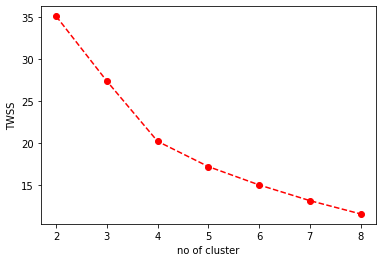

In [32]:
#scree plot
plt.plot(k,TWSS,'ro--')
plt.xlabel('no of cluster')
plt.ylabel('TWSS')

In [33]:
#selecting 4 clusters 
model=KMeans(n_clusters=4)
model.fit(data)

KMeans(n_clusters=4)

In [34]:
mb=pd.Series(model.labels_)

In [35]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6


In [36]:
#10. Add the cluster data with the primary dataset
#creating a new column with labels 
df['clust']=mb

In [37]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,1,1,19,15.0,39,0
1,2,1,21,15.0,81,0
2,3,0,20,16.0,6,3
3,4,0,23,16.0,77,1
4,5,0,31,17.0,40,1


In [38]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
195,196,0,35,120.00,79,1
196,197,0,45,126.00,28,3
197,198,1,32,126.00,74,0
198,199,1,32,-13.25,18,2
199,200,1,30,-13.25,83,0


In [39]:
#11. Split the data into dependent and independent variables
#independent variable
x=df.drop(columns=['CustomerID', 'clust'],axis=1)
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [40]:
#dependent variable
y=df['clust']
y

0      0
1      0
2      3
3      1
4      1
      ..
195    1
196    3
197    0
198    2
199    0
Name: clust, Length: 200, dtype: int32

In [41]:
#12. Split the data into training and testing
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
#13. Build the Model
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf=RandomForestClassifier()

In [44]:
#14. Train the Model
rf.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
#15. Test the Model
#prediction
pred=rf.predict(x_test)

In [46]:
#16. Measure the performance using Evaluation Metrics
# Accuracy of DT model 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

1.0

In [47]:
#confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_test,pred)

array([[12,  0,  0,  0],
       [ 0, 13,  0,  0],
       [ 0,  0,  6,  0],
       [ 0,  0,  0,  9]], dtype=int64)